#### http://kli.web.cern.ch/kli/USPAS_Lectures_Collective_Effects/Lectures/USPAS_01c_longitudinal_dynamics.pdf

In [1]:
import sys
from math import *
import numpy as np
import pandas as pd
from dotted_dict import DottedDict
import matplotlib.pyplot as plt

In [2]:
m0 = 0.9382720813 # proton rest mass, [GeV/c^2] 
c = 299792458 #speed of light [m/s]
C0 = 26658.8832 # LHC circumference MAD-X twiss, [m]
q  = 1.602176565e-19 #C 

In [3]:
E_rest = m0 # [GeV]
E_0 = 7000. # total energy of the reference particle [GeV]
P0 = np.sqrt(E_0**2-E_rest**2)  # reference momentum times the speed of ligth, [GeV/c]
gamma_0 =  E_0/E_rest # gamma realtivistic of the reference particle  # crosscheckd with mad
beta_0 = np.sqrt(1-1/gamma_0**2) # beta realtivistic of the reference particle
f_rev_0 = (beta_0*c)/C0 # revolution frequency [Hz]
T_rev_0 = 1/f_rev_0 # revolution period [s]

In [4]:
delta = 1e-4

In [5]:
P = (1 + delta) * P0 # GeV/c
gamma = np.sqrt(1+(P/m0)**2)
beta = np.sqrt(1-1/gamma**2)

In [6]:
beta

0.9999999910185872

In [7]:
def drift(eta, alpha_c, C0, z, delta):
    z1 =z - eta * delta * C0
    delta1 = delta
    
    return z1, delta1

In [8]:
def RF_map(P0, m0, beta_0, f_RF, c, lag, V_RF, E_0, z, delta):
    
        
    P = (1 + delta) * P0 # GeV/c
    gamma = np.sqrt(1+(P/m0)**2)
    beta = np.sqrt(1-1/gamma**2)    
    old_rvv = beta/beta_0
    
    # RF energy kick 
    k = 2 * np.pi * f_RF  /c
    P = (1 + delta) * P0 # GeV/c
    gamma = np.sqrt(1+(P/m0)**2)
    beta = np.sqrt(1-1/gamma**2)
    tau = z / old_rvv / beta_0
    phase = lag * np.pi / 180. - k * tau
   
    energy = V_RF*np.sin(phase)
    
    
    deltabeta_0 = delta*beta_0
    ptaubeta_0 = np.sqrt(deltabeta_0**2+2*deltabeta_0*beta_0+1)-1
    ptaubeta_0 += energy / E_0 # energy kick
    ptau = ptaubeta_0 / beta_0

    
    delta1 = np.sqrt(ptau ** 2 + 2 * ptau / beta_0 + 1) - 1
    rvv = (1 + delta1) / (1 + ptaubeta_0)
    z1 = z* rvv / old_rvv
    
    
    return z1, delta1

In [22]:
V_RF = 161e-3 # [GV]
lag = 90.# the lang angle of the cavity [degree], phase_RF
f_RF = 400e6 # Hz
omega_RF = 2*np.pi*f_RF
h = 2.#35640 

In [23]:
gamma_tr =  53.7102749510076 # MAD-X twiss
alpha_c = (1/(gamma_tr**2)) # compaction factor
eta = abs(alpha_c -1/(gamma_0**2) ) # slip factor
e_t = 0.001 # longitudinal emittance [m]

In [24]:
n_particles = 10

In [25]:
# create bunch
bunch = DottedDict()
bunch.z = np.zeros(n_particles)
bunch.delta = np.zeros(n_particles)
mu, sigma = 0.0, 1 # mean and standard deviation


sigma_t = 0.075 # bunch length in [m], MAD-X for HL-LHC : cernbox/2019/7/HL_LH_mask_emilia.ipynb 
sigma_e = 0.00011 # relative energy spreead sigma_e/E

z_initial = np.random.normal(mu, sigma, n_particles)*sigma_t
delta_initial = np.random.normal(mu, sigma, n_particles)*sigma_e


bunch.z = z_initial
bunch.delta = delta_initial

In [26]:
bunch.z = z_initial
bunch.delta = delta_initial
df = pd.DataFrame({'turn':[], 'z':[], 'delta':[], 'y':[], 'py':[]})
# Append the initial values, not normalised
df = df.append({'turn':0, 'z':bunch.z, 'delta':bunch.delta}, ignore_index = True)

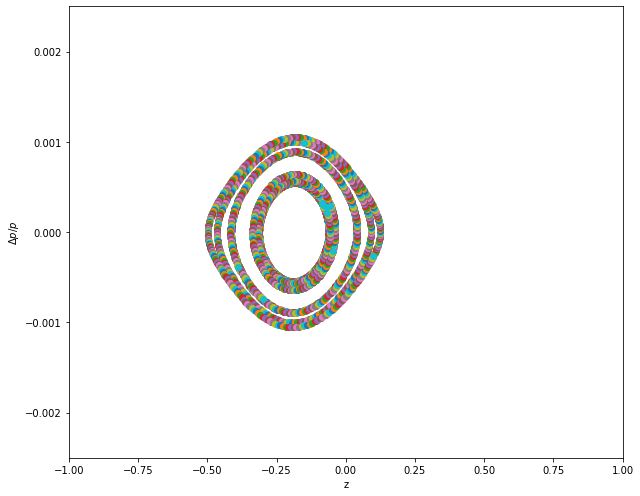

In [27]:
fig, ax = plt.subplots(1,1,figsize=(9,7))



for turn in range(0, 500): #plot for the first 10 turns
    ax.scatter(bunch.z, bunch.delta)#, label= turn)
    ax.set_xlabel('z')
    ax.set_ylabel(r'$\Delta p /p$')
    bunch.z, bunch.delta = drift(eta, alpha_c, C0, bunch.z, bunch.delta)
    bunch.z, bunch.delta = RF_map(P0, m0, beta_0, f_RF, c, lag, V_RF, E_0, bunch.z, bunch.delta)
    
    #plt.legend()
plt.ylim(-0.0025, 0.0025)
plt.xlim(-1, 1)   
plt.tight_layout()